In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor

pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv('./database/train_transformed.csv')
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


# Dividing the Dataset

In [3]:
features = dataset.drop(columns=['Id', 'SalePrice'])
label    = dataset['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, shuffle=True)

print(X_train.shape)
X_train.head()

(1168, 82)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
1175,0.176471,0.75,0.517503,0.412145,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,1.000000,0.4,1.0,0.75,0.2,0.777778,0.50,0.110294,0.131148,1.0,0.0,0.6,0.5,0.50,0.210625,0.666667,1.0,1.0,0.75,0.75,0.25,1.000000,0.124026,0.833333,0.0,0.420805,0.275450,1.0,1.00,1.0,1.000000,0.700959,0.359806,0.0,0.761137,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.140187,1.000000,0.50,0.381523,0.666667,1.0,1.0,0.000000,0.060329,0.000000,0.0,0.0000,0.0,0.0,1.0,1.0,0.0,0.272727,0.25,0.666667,0.75,0.0,0.0,0.0
78,0.411765,0.75,0.456066,0.413970,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.272727,0.4,1.0,0.50,0.6,0.333333,0.50,0.308824,0.704918,1.0,0.0,0.6,0.5,0.25,0.000000,0.333333,1.0,0.5,0.50,0.75,0.25,0.833333,0.000000,0.833333,0.0,0.756849,0.289362,1.0,0.50,0.0,1.000000,0.630645,0.000000,0.0,0.589512,0.000000,0.0,0.666667,0.0,0.500,0.666667,0.333333,0.500000,1.0,0.000000,0.2,0.0,0.280374,0.000000,0.00,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.0,1.0,1.0,0.0,0.272727,1.00,0.666667,0.75,0.0,0.0,1.0
638,0.058824,0.75,0.429425,0.373775,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.227273,0.2,1.0,0.75,0.6,0.444444,0.75,0.720588,0.967213,0.0,0.0,0.4,0.1,0.25,0.000000,0.333333,1.0,0.5,0.25,0.75,0.25,0.833333,0.000000,0.833333,0.0,0.340753,0.130278,1.0,0.75,1.0,0.666667,0.328654,0.000000,0.0,0.307217,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.166667,1.0,0.000000,0.2,0.0,0.261682,0.000000,0.00,0.000000,0.000000,0.0,0.5,0.382730,0.000000,0.297101,0.0,0.0000,0.0,0.0,0.5,1.0,0.0,0.363636,0.50,0.666667,0.75,0.0,0.0,1.0
591,0.235294,0.75,0.566384,0.457723,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.954545,0.4,1.0,0.75,1.0,1.000000,0.50,0.007353,0.032787,0.0,0.0,0.9,0.9,1.00,0.262500,1.000000,1.0,1.0,1.00,0.75,1.00,1.000000,0.237066,0.833333,0.0,0.164384,0.281833,1.0,1.00,1.0,1.000000,0.621985,0.275061,0.0,0.681954,0.333333,0.0,0.666667,0.5,0.375,0.333333,1.000000,0.666667,1.0,0.333333,0.8,1.0,0.009346,0.666667,0.75,0.593794,0.666667,1.0,1.0,0.445741,0.500914,0.000000,0.0,0.0000,0.0,0.0,1.0,1.0,0.0,0.454545,0.75,0.333333,0.75,0.0,0.0,0.0
859,0.235294,0.75,0.440313,0.418475,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.545455,0.6,1.0,0.75,1.0,0.555556,0.75,0.279412,0.377049,0.0,0.0,0.6,0.5,0.50,0.137500,0.333333,1.0,0.5,0.50,0.75,0.50,0.333333,0.109674,0.833333,0.0,0.186216,0.172504,1.0,0.50,1.0,1.000000,0.571452,0.553027,0.0,0.733212,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.8,0.8,0.355140,0.333333,0.50,0.436530,0.666667,1.0,1.0,0.000000,0.118830,0.000000,0.0,0.4625,0.0,0.0,1.0,1.0,0.0,0.636364,0.00,0.666667,0.75,1.0,0.0,0.0


# Feature Selection

In [4]:
model = SelectFromModel(Lasso(alpha=0.005))
model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [5]:
selected_features = X_train.columns[model.get_support()]

print('Total Features    :', len(X_train.columns))
print('Selected Features :', len(selected_features))
print('No. of Features whose coeffs shrank to 0 :', sum(model.estimator_.coef_ == 0))

Total Features    : 82
Selected Features : 19
No. of Features whose coeffs shrank to 0 : 63


In [6]:
X_train = X_train[selected_features]
X_test  = X_test[selected_features]

print(X_train.shape)
X_train.head()

(1168, 19)


,MSSubClass,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,SaleCondition
1175,0.176471,1.000000,0.777778,0.131148,1.0,0.75,0.25,1.00,1.0,0.700959,0.761137,0.000000,0.666667,0.333333,0.6,0.8,1.000000,0.50,0.75
78,0.411765,0.272727,0.333333,0.704918,1.0,0.50,0.25,0.50,0.0,0.630645,0.589512,0.000000,0.333333,0.000000,0.2,0.0,0.000000,0.00,0.75
638,0.058824,0.227273,0.444444,0.967213,0.0,0.25,0.25,0.75,1.0,0.328654,0.307217,0.000000,0.333333,0.000000,0.2,0.0,0.000000,0.00,0.75
591,0.235294,0.954545,1.000000,0.032787,0.0,1.00,1.00,1.00,1.0,0.621985,0.681954,0.333333,1.000000,0.333333,0.8,1.0,0.666667,0.75,0.75
859,0.235294,0.545455,0.555556,0.377049,0.0,0.50,0.50,0.50,1.0,0.571452,0.733212,0.333333,0.666667,0.333333,0.8,0.8,0.333333,0.50,0.75


# Linear Regression

In [88]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_pred = linear_model.predict(X_test)

# Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Error Results

In [124]:
error_df = pd.DataFrame()
prediction_df = pd.DataFrame(y_test)

for model_name, pred in zip(['LinearRegression', 'DecisionTree'], [linear_pred, dt_pred]):
    
    mae = metrics.mean_absolute_error(y_test, pred)
    mse = metrics.mean_squared_error(y_test, pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
    errors = [mae, mse, rmse]

    error_df.insert(0, model_name, errors, True)
    prediction_df.insert(0, model_name+'_predictions', pred, True)

error_df.index = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']

# Plotting the Results

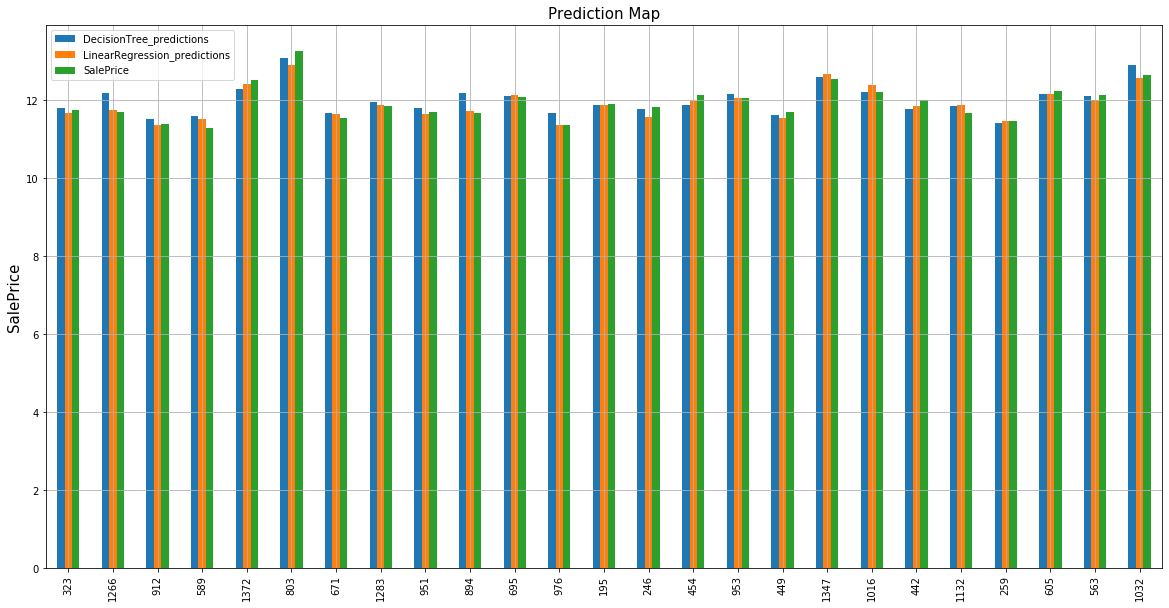

In [130]:
prediction_df.sample(25).plot(kind='bar', figsize=(20, 10))
plt.title('Prediction Map', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.grid(1)

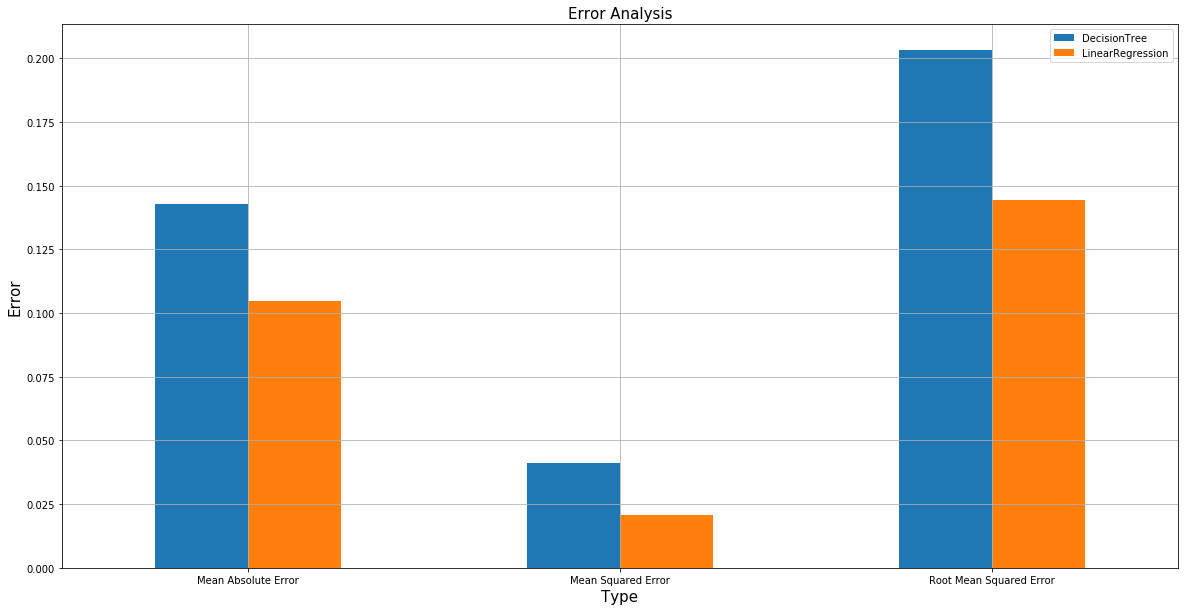

In [131]:
error_df.plot(kind='bar', figsize=(20, 10))

plt.title('Error Analysis', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.xlabel('Type', fontsize=15)
plt.xticks(rotation=360)
plt.grid(1)